# Numerical Recipes Workshop 3
For the week of 11 October to 15 October, 2021

**Please submit your notebook via Noteable by 6:00pm BST on Friday, 15 October.**

**Before submitting your notebook, clear the output by clicking *Restart & Clear Output* from the *Kernel* menu.**

### Learning Objectives
- Integration
- Root finding for nonlinear equations

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 14

## Integration
Simple integration/summation can be done with basic array operations:
* `np.sum` - sum
* `np.cumsum` - cumulative sum

The SciPy [integrate](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html) module (`scipy.integrate`) has several useful functions for computing integrals.

In [3]:
from scipy import integrate

### Integrate This

In the exercises below, we will implement a few different integration methods and experiment with their SciPy analogs.

You will integrate the following function:

$
\Large
\begin{align}
f(x) = cos(2x) + \frac{x}{2} + 1
\end{align}
$

whose integral is

$
\Large
\begin{align}
\int f(x) dx = \frac{sin(2x)}{2} + \frac{x^2}{4} + x + C
\end{align}
$

In [4]:
def my_function(x):
    return np.cos(2*x) + x/2 + 1

def my_int_function(x):
    return np.sin(2*x)/2 + x**2/4 + x

### Trapezoid Rule

For a function, f(x), evaluated at N evenly spaced points from x = a to b, the Trapezoid Rule approximation to the integral of f(x), is given by

$
\Large
\begin{align}
I \simeq h \left( \frac{1}{2}f_0 + f_1 + \ldots + f_{N-2} + \frac{1}{2}f_{N-1} \right),
\end{align}
$

where

$
\Large
\begin{align}
h = \frac{b - a}{N - 1}.
\end{align}
$

In the cell below (after the definition of `my_x`), compute the integral of f(x) over the range [0, 3] using the trapezoid rule. Use the variables `my_x` and `my_dx` defined below. Compare with the [SciPy implementation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.trapz.html) and analytical result.

In [5]:
my_x = np.linspace(0, 3, 101)
my_dx = (my_x[-1] - my_x[0]) / (my_x.size - 1)

In [6]:
# Remove the line that says "raise NotImplementedError"
# YOUR CODE HERE
y = my_function(my_x)
y_right = y[-1] # right endpoints
y_left = y[0] # left endpoints
T_end = (my_dx/2) * np.sum(y_right + y_left)
T_mid = my_dx*np.sum(y[1:-1])
I_num = T_end + T_mid
I_num

5.110334165740222

In [7]:
#analytical
#I = np.sum(my_int_function(my_x))
#scipy
I = integrate.trapz(y, x=None, dx=my_dx)
I

5.1103341657402215

In the cell below, repeat the trapezoid rule integration for varying N, e.g., from ~10 to ~1000 and plot the error as a function of N. For this exercise, define the error as the absolute value of the difference between analytical and numerical results.

In [8]:
def my_trapz(y,my_dx):
    y_right = y[-1] # right endpoints
    y_left = y[0] # left endpoints
    T_end = (my_dx/2) * (y_right + y_left)
    T_mid = my_dx*np.sum(y[1:-1])
    I_num = T_end + T_mid
    return I_num

In [123]:
I_exct = my_int_function(3) - my_int_function(0)
I_exct

5.110292250900537

In [124]:
N = [10,100,1000]
error = []
for n in N:
    my_x = np.linspace(0, 3, n)
    my_dx = (my_x[-1] - my_x[0]) / (n - 1)
    y = my_function(my_x)
    I_num = my_trapz(y, my_dx)
    err = np.abs(I_exct - I_num)
    error.append(err)

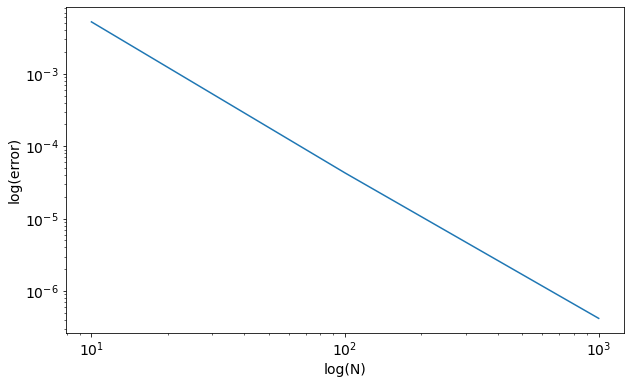

In [125]:
plt.loglog(N,error);
plt.xlabel('log(N)')
plt.ylabel('log(error)');

### Simpson's Rule

For a function, f(x), evaluated at N evenly spaced points from x = a to b, the Simpson's Rule approximation to the integral of f(x), is given by

$
\large
\begin{align}
I \simeq h \left( \frac{1}{3}f_0 + \frac{4}{3}f_1 + \frac{2}{3}f_2 + \frac{4}{3}f_3 + \frac{2}{3}f_4 + \ldots + \frac{2}{3}f_{N-3} + \frac{4}{3}f_{N-2} + \frac{1}{3}f_{N-1} \right).
\end{align}
$

In the cell below, compute the same integral as you did previously using Simpson's Rule and compare with the [SciPy implementation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simps.html). Can you do this without loops by using array slicing?

In [12]:
# Remove the line that says "raise NotImplementedError"
# YOUR CODE HERE
my_x = np.linspace(0, 3, 101)
my_dx = (my_x[-1] - my_x[0]) / (my_x.size - 1)
y = my_function(my_x)

In [13]:
def my_simps(y,my_dx):
    y_odd = y[1:-1:2]
    y_even = y[2:-1:2]
    y_right = y[-1] # right endpoints
    y_left = y[0] # left endpoints
    T_end = (1/3) * (y_right + y_left)
    T_odd = (4/3) * np.sum(y_odd)
    T_even = (2/3) * np.sum(y_even)
    I = my_dx * (T_end + T_odd + T_even)
    return I

Now, compute the error for Simpson's rule as a function of N. Make a plot and compare with the Trapezoid Rule.

**Note: to perform optimally, Simpson's Rule requires an odd number of points.**

In [14]:
# Remove the line that says "raise NotImplementedError"
# YOUR CODE HERE
N = [10,100,1000,10000,100000]
error = []
for n in N:
    my_x = np.linspace(0, 3, n)
    my_dx = (my_x[-1] - my_x[0]) / (n-1)
    y = my_function(my_x)
    I_num = my_simps(y, my_dx)
    err = np.abs(I_exct - I_num)
    error.append(err)

Text(0, 0.5, 'log(error)')

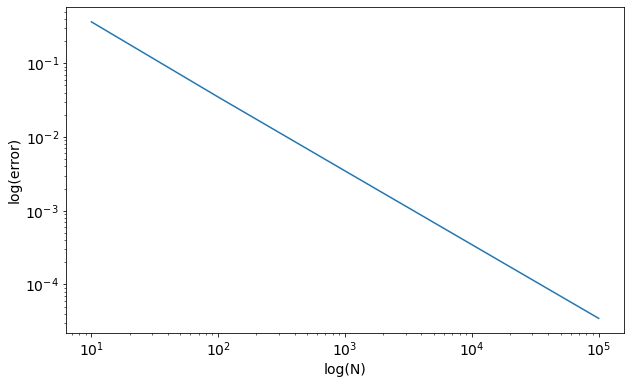

In [122]:
plt.loglog(N,error)
plt.xlabel('log(N)')
plt.ylabel('log(error)');

### SciPy `quad` function

The [SciPy quad function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad) has several nice features, like accepting a function, the ability to integrate to infinity, and estimating its own error. In the cell below, use `quad` to perform the same integration. No demonstration has been given on purpose. Use the documentation available at the link in this cell. Part of this challenge is learning from existing documentation only.

In [16]:
# Remove the line that says "raise NotImplementedError"
# YOUR CODE HERE
a = my_x[0]
b = my_x[-1]
y = lambda x: my_function(x)
integrate.quad(y, a, b)

(5.110292250900538, 5.6735641195132945e-14)

## Root Finding - a practical example

This section will introduce you to a practical example of root finding for a non-linear equation.

### The temperature of interstellar dust grains

Understanding the nature of interstellar dust grains is vital to many areas of astronomy, from star formation to measuring the cosmic microwave background (CMB). Many observed properties of interstellar dust are derived from knowing its temperature. In general, dust is well mixed with the gas in the interstellar medium (ISM), but the two are rarely at the same temperature.

The timescales for dust-related processes are very short, so the dust temperature can be calculated by assuming it is in thermal equilibrium at all times (i.e., $de/dt = 0$). Then, one only needs to balance the various heating and cooling processes, i.e., to find the root of the energy loss equation:

$
\begin{align}
\large
\frac{de}{dt} = \Gamma(T_{dust}) - \Lambda(T_{dust}),
\end{align}
$

where $\Gamma$ and $\Lambda$ are the dust heating and cooling rates, respectively.

Including the relevant heating and cooling processes, this becomes

$
\begin{align}
\large
\frac{de}{dt} = 4 \sigma T_{CMB}^{4} \kappa_{gr} +
\Gamma_{isrf} + \Lambda_{gas/grain}(T_{dust}, T_{gas}, n_{H}) - 4 \sigma T_{dust}^{4} \kappa_{gr},
\end{align}
$

where $\sigma$ is the Stefan-Boltzmann constant, $T_{CMB}$ is the temperature of the CMB, $\kappa_{gr}$ is the dust opacity, $\Gamma_{isrf}$ is the heating from the instellar radiation field, and $\Lambda_{gas/grain}$ is the rate of heat exchange via collisions between the gas and dust. The first term represents heating from the CMB, the second is heating from nearby stars, the third term transfers heat from the hotter to the cooler matter, and the final term is the cooling of the dust by thermal radiation.

The opacity of the dust can be approximated by the piece-wise power-law:

$
\begin{align}
\large
\kappa_{gr}(T_{dust}) \propto \left\{ \begin{array}{ll}
T_{dust}^{2} & , T_{dust} < 200 K,\\
\textrm{constant} & , 200\ K < T_{dust} < 1500\ K,\\
T_{dust}^{-12} & , T_{dust} > 1500\ K.
\end{array} \right.
\end{align}
$

The gas/grain heat transfer rate is given by:

$
\begin{align}
\large
\Lambda_{gas/grain} = 7.2\times10^{-8} n_{H}
\left(\frac{T_{gas}}{1000 K}\right)^{\frac{1}{2}} (1 - 0.8 e^{-75/T_{gas}}) (T_{gas} - T_{dust})\ [erg/s/g],
\end{align}
$

where $n_{H}$ is the number density of the gas.

### Calculating dust temperatures with root finding

The above equations have been coded below with the full heat balance equation (i.e., the equation for $de/dt$) implemented as the `gamma_grain` function. Do `help(gamma_grain)` to see how it can be called.

Assuming a constant gas temperature, $T_{gas}$ and gas density, $n_{H}$, calculate the dust temperature, $T_{dust}$, using bisection, the secand method, and the Scipy implementation of [Brent's method](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brentq.html#scipy.optimize.brentq). You will implement your own bisection and secant methods. Count the number of steps to reach a solution.

In the `gamma_grain` function, use the default values for the interstellar radiation field, `isrf`, and redshift, `z`. You are welcome to experiment with different values in your own time.

In [17]:
mh = 1.673735e-24 # g
# Stefan-Boltzmann constant
sigma_b = 5.670373e-5 # erg cm^−2 s^−1 K^−4

def gas_grain(Tgas):
    """
    Return gas/grain heat transfer rate coefficient.
    """

    grain_coef = 1.2e-31 * 1.0e3**-0.5 / mh
    gasgra = grain_coef * Tgas**0.5 * \
        (1.0 - (0.8 * np.exp(-75.0 / Tgas)))
    return gasgra

def kappa_grain(Tdust):
    """
    Return grain mean opacity.
    """

    kgr1   = 4.0e-4
    kgr200 = 16.0
    T_subl = 1500.

    Tdust = np.asarray(Tdust)
    kgr = np.zeros(Tdust.size)

    f1 = Tdust < 200
    if f1.any():
        kgr[f1] = kgr1 * Tdust[f1]**2

    kgr[(Tdust >= 200) & (Tdust < T_subl)] = kgr200

    f2 = Tdust >= T_subl
    if f2.any():
        kgr[f2] = kgr200 * (Tdust[f2] / T_subl)**-12
    
    return kgr

def gamma_isrf():
    """
    Interstellar radiation field heating rate coefficient.
    """

    return 4.154682e-22 / mh

def gamma_grain(Tdust, Tgas, nh, isrf=1.7, z=0):
    """
    Return the grain heating rate.
    
    Parameters
    ----------
    
    Tdust : float
        dust temperature in K
    Tgas : float
        gas temperature in K
    nh : float
        Hydrogen number density in cm^-3
    isrf : float, optional
        interstellar radiation field strengh in Habing units
        default: 1.7 (typical for local interstellar medium)
    z : float, optional
        current redshift, used to set the temperature of the
        Cosmic Microwave Background.
        default: 0
    """

    TCMB = 2.73 * (1 + z)
    my_isrf = isrf * gamma_isrf()

    return my_isrf + \
        4 * sigma_b * kappa_grain(Tdust) * (TCMB**4 - Tdust**4) + \
        (gas_grain(Tgas) * nh * (Tgas - Tdust))

### Physical conditions of the gas

Use the values in the cell below for the temperature of the gas, $T_{gas}$, the hydrogen number density, $n_{H}$, and the CMB temperature, $T_{CMB}$.

In [18]:
### Tgas and nh values
Tgas = 100 # K
nh = 1e3 # cm^-3
TCMB = 2.73

### Bisection
Implement the bisection method to calculate $T_{dust}$ for a relative tolerance of $10^{-4}$, where the relative tolerance is given by:

$
\begin{align}
rtol = \left|\frac{val_{new} - val_{old}}{val_{old}}\right|.
\end{align}
$

A sensible initial bound is $[T_{CMB}, T_{gas}]$, where $T_{CMB} = 2.73 K$ in the local Universe.

In [65]:
def bisect(Tgas, nh, a, b, TOL):
    step = 1
    while np.abs((b-a)/a) > TOL:
        m = (a+b)/2
        if gamma_grain(a,Tgas,nh)*gamma_grain(m,Tgas,nh) < 0:
            a = a
            b = m
        else:
            a = m
            b = b
        step += 1
    m = (a+b)/2
    return m, step

In [138]:
tol = 1e-4

In [67]:
bisect(Tgas, nh, TCMB, Tgas, tol)

(40.855221099853516, 16)

### Secant Method

Implement the secant method for the same tolerance and initial guesses.

In [144]:
def secant(Tgas, nh, x0, x1, TOL):
    step = 1
    while np.abs((x1-x0)/x0) > TOL:
        x2 = x1 - gamma_grain(x1,Tgas,nh) * ((x1-x0)/(gamma_grain(x1,Tgas,nh)- gamma_grain(x0,Tgas,nh))) 
        x0 = x1
        x1 = x2
        step += 1
    x2 = x1 - gamma_grain(x1,Tgas,nh) * ((x1-x0)/(gamma_grain(x1,Tgas,nh)- gamma_grain(x0,Tgas,nh))) 
    return(x2,step)

In [145]:
secant(Tgas, nh, TCMB, Tgas, tol) #not sure why this isnt working

(array([29918650.21264512]), 6)

In [191]:
def secant(Tgas, nh, x1, x2, tol):
    n = 0; xm = 0; x0 = 0; c = 0;
    while np.abs((x2 - x1)) > tol:
        # calculate the intermediate value
        x0 = ((x1 * gamma_grain(x2,Tgas,nh) - x2 * gamma_grain(x1,Tgas,nh)) / (gamma_grain(x2,Tgas,nh) - gamma_grain(x1,Tgas,nh)));
        # update the value of interval
        x1 = x2
        x2 = x0
        # update number of iteration
        n += 1
    xm = ((x1 * gamma_grain(x2,Tgas,nh) - x2 * gamma_grain(x1,Tgas,nh)) / (gamma_grain(x2,Tgas,nh) - gamma_grain(x1,Tgas,nh)));
    return xm, n

In [192]:
secant(Tgas, nh, TCMB, Tgas, tol)

(array([29918650.21264512]), 6)

### Further Discussion
Many experienced the behavior that the secant method arrived at a solution of millions of K when starting with an initial guess of $T = T_{CMB}$. Run the cell below to produce a plot of $de/dt$ vs. $T.$

As the plot illustrates, this is because de/dt is very flat at low temperatures, causing the first iteration to overshoot. For this reason, it is often necessary to place sanity checks on the calculation, for example, mandating that the solution stay within the initial bounds of [TCMB, Tgas]. This also demonstrates the value of trying to visualize the data to gain insight into how to solve the problem.

In [52]:
nH = nh

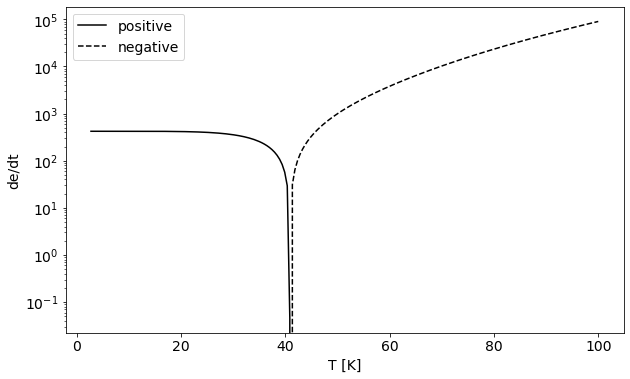

In [53]:
my_T_vals = np.linspace(TCMB, Tgas, 200)
my_gamma = gamma_grain(my_T_vals, Tgas, nH)

plt.semilogy(my_T_vals, my_gamma, color='k', label='positive')
plt.semilogy(my_T_vals, -my_gamma, linestyle='--', color='k', label='negative')
plt.xlabel('T [K]')
plt.ylabel('de/dt')
plt.legend()
plt.show()

### Brent's Method

Use [Brent's method](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brentq.html#scipy.optimize.brentq) to calculate $T_{dust}$.

As a bonus, try calculating $T_{dust}$ for a range of $n_{H}$ from $1\ cm^{-3}$ to $10^{13} cm^{-3}$ and plotting $T_{dust}$ vs. $n_{H}$.

In [54]:
import scipy.optimize as opt

In [88]:
def gamma_ans(x):
    return gamma_grain(x,Tgas,nh)

In [90]:
root = opt.brentq(gamma_ans, TCMB, Tgas)
root

40.85667182448289

In [97]:
# Try a range of nH values.
nH = np.logspace(0, 13, 100)


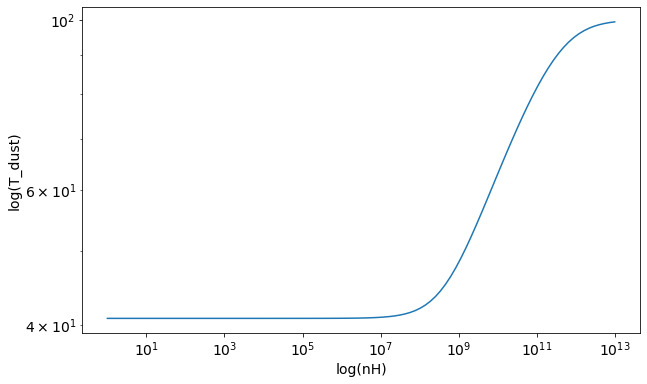

In [102]:
roots = []
for n in nH:
    def gamma_ans(x):
        return gamma_grain(x,Tgas,n)
    root = opt.brentq(gamma_ans, TCMB, Tgas)
    roots.append(root)
plt.loglog(nH,roots)
plt.xlabel('log(nH)')
plt.ylabel('log(T_dust)');

### Physical Explanation
The dust is heated by the cosmic microwave background (CMB), the interstellar radiation field (ISRF), and collisions with the gas. At low densities, the heating is dominated by the ISRF (the CMB is always sub-dominant here). Collisions with the gas are rare because the density is low. As the density increases, collisions are more common and heat is transferred efficiently from the gas into the dust. At high enough densities, they become fully coupled.